# This notebook plots dff traces extracted manually vs those extracted using stimulus-specific modules.


In [6]:
import os
import platform
import pandas as pd
import numpy as np
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info


#sets the drive path of hard-disk containing observatory data, based on current OS
if platform.system()=='Windows':
    drive_path = 'g:/'
else:
    drive_path = '/Volumes/Brain2016/'

manifest_path = os.path.join(drive_path, 'BrainObservatory/manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)


In [7]:
# get a sample experiment id so we can load the data

rbp4_ecs = boc.get_experiment_containers(targeted_structures=['VISpm'],cre_lines=['Rbp4-Cre'])
container_id = rbp4_ecs[0]['id']
exp = boc.get_ophys_experiments(experiment_container_ids=[container_id], 
                                stimuli=[stim_info.NATURAL_SCENES])[0]

print('Experiment container info:')
print exp

# then load the data (dff traces)
data_set = boc.get_ophys_experiment_data(exp['id'])
specimens=data_set.get_cell_specimen_ids()

# pick a cell to use
cell_loc = 0

# pick a trial (image) to use
trial_loc = 1

Experiment container info:
{'session_type': u'three_session_B', 'age_days': 80.0, 'imaging_depth': 375, 'experiment_container_id': 511511015, 'targeted_structure': u'VISpm', 'cre_line': u'Rbp4-Cre', 'id': 510706209}


# 1) Get sweep responses using get_dff_traces and get_stimulus_table 

In [8]:
# get the data
timestamps, traces = data_set.get_dff_traces()

# pull out the stim info
stim_table = data_set.get_stimulus_table('natural_scenes') #table with image index and start and end times of each trial
num_trials = np.shape(stim_table)[0] # there are 119*50 trials
image_id = stim_table.frame; # this is the index of the image, with gray screen as -1

# get the sweep_response for the sample cell and trial
dff_trace_1=traces[cell_loc,stim_table.start[trial_loc]-28:stim_table.end[trial_loc]+28]


# 2) Get sweep responses using natural scenes sweep_response

In [12]:
from allensdk.brain_observatory.natural_scenes import NaturalScenes
ns = NaturalScenes(data_set)
print("done analyzing natural scenes")

# get the sweep_response for the sample cell and trial
sr= ns.sweep_response
dff_trace_2 = sr[str(cell_loc)].iloc[trial_loc] 


done analyzing natural scenes


# Plot the two sweep responses to compare

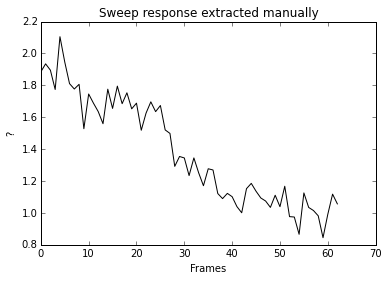

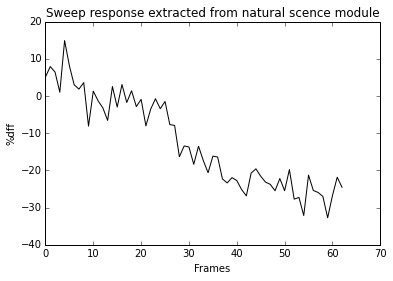

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,axs = plt.subplots()
plt.plot(dff_trace_1, color='k')
plt.xlabel('Frames')
plt.ylabel('?')
plt.title('Sweep response extracted manually')

fig,axs = plt.subplots()
plt.plot(dff_trace_2, color='k')
plt.xlabel('Frames')
plt.ylabel('%dff')
plt.title('Sweep response extracted from natural scence module')
